# Transparência COVID-19 Poços de Caldas

In [ ]:
# Bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter, MaxNLocator
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import math

# Importação do arquivo de dados

pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv("https://raw.githubusercontent.com/rmsulino/transparencia_covid19/master/covid19_pocosdecaldas.csv")

df.replace(np.nan, 'x', inplace = True)
df.replace('evento1', 'Flexibilização Comércio', inplace = True)

# Configurações Seaborn

#sns.set_style("darkgrid")
sns.set_style("whitegrid")
#sns.set_context("paper")
#sns.set_context("talk")
#sns.set_context("poster")
sns.set_context("notebook", font_scale = 1, rc={"grid.linewidth": 0.6})
#sns.set_palette("husl",3)
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui)

df.head()

,id,data,testes_realizados,casos_confirmados,novos_confirmados,descartados_total,casos_descartados_exame,casos_descartados_criterio_clinico,obitos_confirmados,obitos_nao_residentes,recuperados,casos_suspeitos,novos_suspeitos,confirmados_isolamento,confirmados_ala,confirmados_uti,suspeitos_isolamento,suspeitos_ala,suspeitos_uti,obitos_investigacao,uti_covid,uti_covid_oc_conf,uti_covid_oc_susp,eventos
0,1,17/03/2020,0,0,0,1,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,x
1,2,18/03/2020,0,0,0,1,0,0,0,0,0,7,5,0,0,0,0,0,0,0,0,0,0,x
2,3,19/03/2020,0,0,0,1,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,x
3,4,20/03/2020,0,1,1,2,0,0,0,0,0,10,3,0,0,0,0,0,0,0,0,0,0,x
4,5,21/03/2020,0,1,0,2,0,0,0,0,0,11,1,0,0,0,0,0,0,0,0,0,0,x


# Série histórica

### Casos confirmados

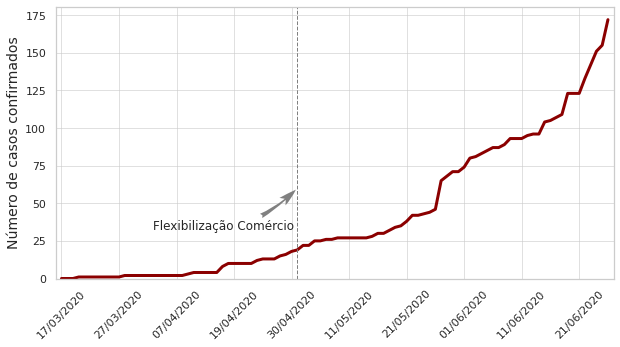

In [ ]:
df_confirmados = df.copy()

fig1, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_major_formatter(DateFormatter('%d/%m/%Y'))

plt.xticks(df_confirmados.index, df_confirmados["data"].values, rotation=45)

x = df_confirmados.reset_index()['index']
y = df_confirmados['casos_confirmados']

sns.lineplot(x=x, y=y, data=df_confirmados, linewidth=3, color='darkred')

#plt.title('Casos confirmados', fontsize=20)
plt.ylabel('Número de casos confirmados', fontsize=14)
plt.xlabel('')

#for label in ax.get_xticklabels()[::8]:
#    label.set_visible(True)

ax.set_ylim(bottom=0.)
ax.set_xlim(left=0., right=max(x))

# limites eixos x e y
plt.ylim(0, None)
plt.xlim(-1, max(x)+1)

labels = list(df_confirmados['data'])

def format_fn(tick_val, tick_pos):
    if int(tick_val) in x:
        return labels[int(tick_val)]
    else:
        return ''

ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

for i, txt in enumerate(df_confirmados['eventos']):
    if (txt != 'x'):
        desloc = int(i/2)
        plt.annotate(txt,
                     xy=(x[i], 40+desloc),
                     xytext=(x[i]-25, 15+desloc),
                     arrowprops=dict(arrowstyle="fancy, head_width=0.8, head_length=1.5",
                                     fc="0.5",
                                     ec="none",
                                     connectionstyle="angle3,angleA=0,angleB=45"),
                     fontsize=12,
                     va='center')

df_confirmados.replace('x', np.nan, inplace = True)

evento = df_confirmados[df_confirmados['eventos'].notnull()].index
xposition = evento

for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle='--', linewidth=1)

plt.savefig("confirmados.png", transparent=True)

### Recuperados

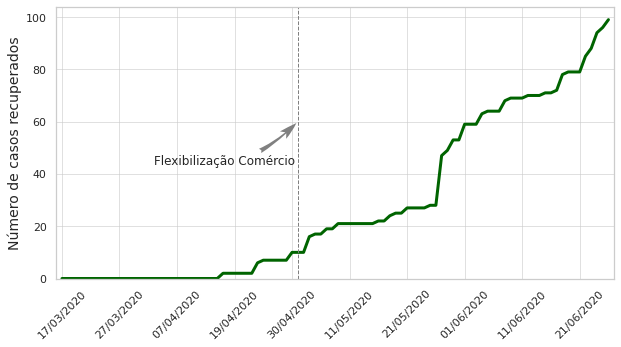

In [ ]:
df_recuperados = df.copy()

fig2, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_major_formatter(DateFormatter('%d/%m/%Y'))

plt.xticks(df_recuperados.index, df_recuperados["data"].values, rotation=45)

x = df_recuperados.reset_index()['index']
y = df_recuperados['recuperados']

sns.lineplot(x=x, y=y, data=df_recuperados, linewidth=3, color='darkgreen')

#plt.title('Casos recuperados', fontsize=20)
plt.ylabel('Número de casos recuperados', fontsize=14)
plt.xlabel('')

#for label in ax.get_xticklabels()[::8]:
#    label.set_visible(True)

ax.set_ylim(bottom=0.)
ax.set_xlim(left=0., right=max(x))

# limites eixos x e y
plt.ylim(0, None)
plt.xlim(-1, max(x)+1)

labels = list(df_confirmados['data'])


def format_fn(tick_val, tick_pos):
    if int(tick_val) in x:
        return labels[int(tick_val)]
    else:
        return ''

ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

for i, txt in enumerate(df_recuperados['eventos']):
    if (txt != 'x'):
        desloc = int(i/2)
        plt.annotate(txt,
                     xy=(x[i], 40+desloc),
                     xytext=(x[i]-25, 25+desloc),
                     arrowprops=dict(arrowstyle="fancy, head_width=0.8, head_length=1.5",
                                     fc="0.5",
                                     ec="none",
                                     connectionstyle="angle3,angleA=0,angleB=45"),
                     fontsize=12,
                     va='center')

df_recuperados.replace('x', np.nan, inplace = True)

evento = df_recuperados[df_recuperados['eventos'].notnull()].index
xposition = evento

for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle='--', linewidth=1)

plt.savefig("recuperados.png", transparent=True)

### Óbitos residentes

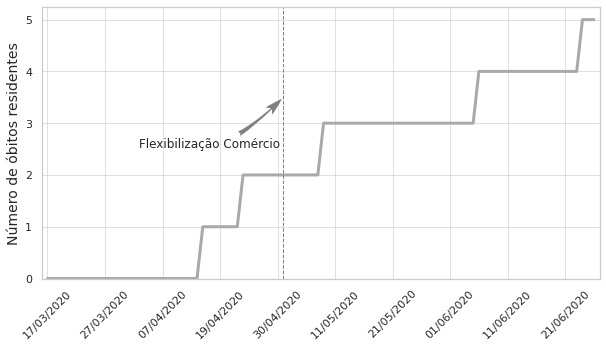

In [ ]:
df_obitos = df.copy()

fig3, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_major_formatter(DateFormatter('%d/%m/%Y'))

plt.xticks(df_obitos.index, df_obitos["data"].values, rotation=45)

df_obitos['obitos_residentes'] = df_obitos['obitos_confirmados'] - df_obitos['obitos_nao_residentes']

x = df_obitos.reset_index()['index']
y = df_obitos['obitos_residentes']

sns.lineplot(x=x, y=y, data=df_obitos, linewidth=3, color='darkgray')

#plt.title('Óbitos residentes', fontsize=20)
plt.ylabel('Número de óbitos residentes', fontsize=14)
plt.xlabel('')

#for label in ax.get_xticklabels()[::8]:
#    label.set_visible(True)

ax.set_ylim(bottom=0.)
ax.set_xlim(left=0., right=max(x))

# limites eixos x e y
plt.ylim(0, None)
plt.xlim(-1, max(x)+1)

labels = list(df_confirmados['data'])


def format_fn(tick_val, tick_pos):
    if int(tick_val) in x:
        return labels[int(tick_val)]
    else:
        return ''

ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

yint = range(min(y), math.ceil(max(y))+1)
plt.yticks(yint)

for i, txt in enumerate(df_obitos['eventos']):
    if (txt != 'x'):
        desloc = int(i/20)
        plt.annotate(txt,
                     xy=(x[i], 1.5+desloc),
                     xytext=(x[i]-25, 0.6+desloc),
                     arrowprops=dict(arrowstyle="fancy, head_width=0.8, head_length=1.5",
                                     fc="0.5",
                                     ec="none",
                                     connectionstyle="angle3,angleA=0,angleB=45"),
                     fontsize=12,
                     va='center')

df_obitos.replace('x', np.nan, inplace = True)

evento = df_obitos[df_obitos['eventos'].notnull()].index
xposition = evento

for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle='--', linewidth=1)

plt.savefig("obitos.png", transparent=True)

### Testes realizados

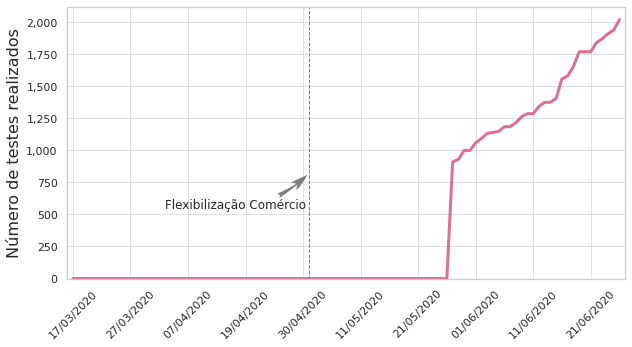

In [ ]:
df_testes = df.copy()

fig, ax = plt.subplots(figsize=(10, 5))

plt.xticks(df_testes.index, df_testes["data"].values, rotation=45)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # No decimal places

x = df_testes.reset_index()['index']
y = df_testes['testes_realizados']

sns.lineplot(x=x, y=y, data=df_testes, linewidth=3, color='palevioletred')

ax.plot(y, color='palevioletred', linewidth=0.5)

plt.ylabel('Número de testes realizados', fontsize=16)
plt.xlabel('')

ax.set_ylim(bottom=0.)
ax.set_xlim(left=0., right=max(x))

# limites eixos x e y
plt.ylim(0, None)
plt.xlim(-1, max(x)+1)

labels = list(df_testes['data'])

def format_fn(tick_val, tick_pos):
    if int(tick_val) in x:
        return labels[int(tick_val)]
    else:
        return ''

ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

for i, txt in enumerate(df_testes['eventos']):
    if (txt != 'x'):
        desloc = int(i/2)
        plt.annotate(txt,
                     xy=(x[i], 800+desloc),
                     xytext=(x[i]-25, 550+desloc),
                     arrowprops=dict(arrowstyle="fancy, head_width=0.8, head_length=1.5",
                                     fc="0.5",
                                     ec="none",
                                     connectionstyle="angle3,angleA=0,angleB=45"),
                     fontsize=12,
                     va='center')

df_testes.replace('x', np.nan, inplace = True)

evento = df_testes[df_testes['eventos'].notnull()].index
xposition = evento

for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle='--', linewidth=1)

fig.savefig('testes.png', dpi=70)

### Internações em UTI (casos confirmados)

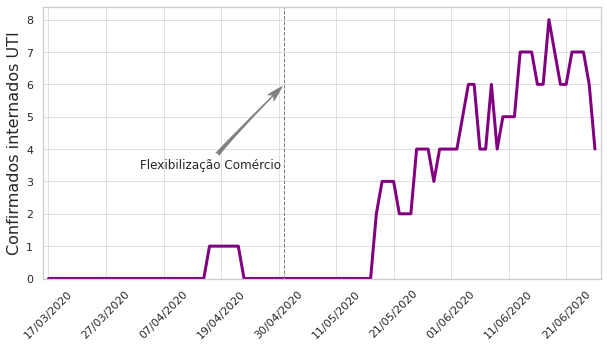

In [ ]:
df_uti = df.copy()

fig, ax = plt.subplots(figsize=(10, 5))

plt.xticks(df_uti.index,df_uti["data"].values, rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

x = df_uti.reset_index()['index']
y = df_uti['confirmados_uti']

sns.lineplot(x=x, y=y, data=df_uti, linewidth=3, color='purple')

ax.plot(y, color='purple', linewidth=0.5)

lines = ax.plot(y, color='purple', linewidth=0.5)

plt.xlabel('')
plt.ylabel('Confirmados internados UTI', fontsize=16)

# limites eixos x e y
plt.ylim(0, None)
plt.xlim(-1, max(x)+1)

labels = list(df_uti['data'])

def format_fn(tick_val, tick_pos):
    if int(tick_val) in x:
        return labels[int(tick_val)]
    else:
        return ''

ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

for i, txt in enumerate(df_uti['eventos']):
    if (txt != 'x'):
        desloc = int(i/20)
        plt.annotate(txt,
                     xy=(x[i], 4+desloc),
                     xytext=(x[i]-25, 1.5+desloc),
                     arrowprops=dict(arrowstyle="fancy, head_width=0.8, head_length=1.5",
                                     fc="0.5",
                                     ec="none",
                                     connectionstyle="angle3,angleA=0,angleB=45"),
                     fontsize=12,
                     va='center')

df_uti.replace('x', np.nan, inplace = True)

evento = df_uti[df_uti['eventos'].notnull()].index
xposition = evento

for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle='--', linewidth=1)

fig.savefig('internados_uti.png', dpi=70)

### Casos suspeitos

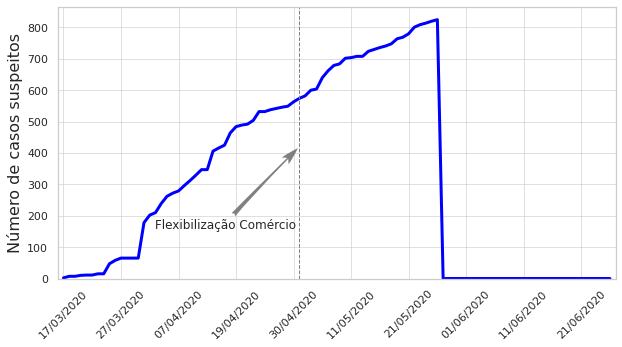

In [ ]:
df_suspeitos = df.copy()

fig, ax = plt.subplots(figsize=(10, 5))

plt.xticks(df_suspeitos.index, df_suspeitos["data"].values, rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

x = df_suspeitos.reset_index()['index']
y = df_suspeitos['casos_suspeitos']

sns.lineplot(x=x, y=y, data=df_suspeitos, linewidth=3, color='blue')

ax.plot(y, color='blue', linewidth=0.5)

plt.xlabel('')
plt.ylabel('Número de casos suspeitos', fontsize=16)

ax.set_ylim(bottom=0.)
ax.set_xlim(left=0., right=max(x))

# limites eixos x e y
plt.ylim(0, None)
plt.xlim(-1, max(x)+1)

labels = list(df_suspeitos['data'])

def format_fn(tick_val, tick_pos):
    if int(tick_val) in x:
        return labels[int(tick_val)]
    else:
        return ''

ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

for i, txt in enumerate(df_suspeitos['eventos']):
    if (txt != 'x'):
        desloc = int(i/2)
        plt.annotate(txt,
                     xy=(x[i], 400+desloc),
                     xytext=(x[i]-25, 150+desloc),
                     arrowprops=dict(arrowstyle="fancy, head_width=0.8, head_length=1.5",
                                     fc="0.5",
                                     ec="none",
                                     connectionstyle="angle3,angleA=0,angleB=45"),
                     fontsize=12,
                     va='center')

df_suspeitos.replace('x', np.nan, inplace = True)

evento = df_suspeitos[df_suspeitos['eventos'].notnull()].index
xposition = evento

for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle='--', linewidth=1)

fig.savefig('suspeitos.png', dpi=70)